In [3]:
import glob
import json
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import re
import sys
from matplotlib import colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from neuromaps import images
from neuromaps.datasets import fetch_fslr
from neuromaps.images import construct_shape_gii, load_data, load_gifti
from neuromaps.parcellate import Parcellater
from nilearn import datasets, surface, plotting
from nilearn.plotting import show
from os.path import join as ospj
from surfplot import Plot


In [4]:
subject = "sub-0001305"
config_file = "/cbica/projects/luo_wm_dev/code/tract_profiles/config/config_HCPD.json"

# Read config from the specified file
with open(config_file, "rb") as f:
    config = json.load(f)

data_root = config['data_root']
dataset = config['dataset']
derivs_dir = ospj(data_root, f"derivatives/{dataset}_vol_to_surf")
out_dir = ospj(derivs_dir, subject, "native_acpc")

# Create directory for vol_to_surf outputs
if not os.path.exists(derivs_dir):
    os.makedirs(derivs_dir)

if not os.path.exists(ospj(derivs_dir, subject, "native_acpc")):
        os.makedirs(ospj(derivs_dir, subject, "native_acpc"))
        print(f"Directory derivatives/{dataset}_vol_to_surf/{subject}/native_acpc created.")
else:
        print(f"Directory derivatives/{dataset}_vol_to_surf/{subject}/native_acpc already exists.")

########################################
# Functions
########################################
# Define function for extracting probabilities at different depths
def apply_vol_to_surf(img, depth, surf_mesh):
    surf_data = surface.vol_to_surf(img, 
                        surf_mesh, 
                        kind='line', 
                        radius=1,
                        n_samples=None, 
                        mask_img=None, 
                        inner_mesh=None, 
                        depth=[depth])
    return(surf_data)
# Notes: 
# radius = size in mm of the neighborhood around each vertex in which to draw samples
# depth = expressed as a fraction of radius (default = 3)


# Define function for saving gifti files for vol_to_surf output
def save_gifti_file(vol_to_surf_output, subject, tract, depth, outdir):
    data = vol_to_surf_output.astype(np.float32)
    filename = f"{subject}_{tract}_{depth}.shape.gii"
    file_path = ospj(outdir, filename)
    gii_data = nib.gifti.gifti.GiftiDataArray(data)
    gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
    nib.save(gii_array, file_path)
    print(f"Saved GIFTI file for {subject} {tract}")

 
########################################
# Load Files
########################################
# load tdi maps (LAS) for each subject = img 
tdi_maps_path = ospj(data_root, "derivatives", f"{dataset}_tdi_maps", subject, "tdi_binarized")
tdi_files = os.listdir(tdi_maps_path)  
tdi_maps = {}
for file in tdi_files: # loop through each file in my tdi_binarzed dir, extract the tract name, and load it
    if file.endswith('.nii.gz'):
        tract_name = file.split('_')[1]
        file_path = ospj(tdi_maps_path, file)
        tdi_maps[tract_name] = nib.load(file_path)

# load freesurfer lh.white, rh.white in native acpc (LAS) = surfmesh
surfs_path = ospj(data_root, "derivatives", f"{dataset}_fs_qsiprep_xfm", subject, "surfaces/native_acpc")
surfmesh_files = os.listdir(surfs_path)  
lh_surf_mesh = [surfmesh_file for surfmesh_file in surfmesh_files if "lh.white" in surfmesh_file]
rh_surf_mesh = [surfmesh_file for surfmesh_file in surfmesh_files if "rh.white" in surfmesh_file]
lh_surf_mesh = ospj(surfs_path, lh_surf_mesh[0])
rh_surf_mesh = ospj(surfs_path, rh_surf_mesh[0])



Directory derivatives/HCPD_vol_to_surf/sub-0001305/native_acpc already exists.


In [ ]:
lh_surf_mesh = [surfmesh_file for surfmesh_file in surfmesh_files if "lh.inflated" in surfmesh_file]


In [16]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["VOFL"], depth = 0.01, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)

In [26]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["VOFL"], depth = 0.5, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)

# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='lateral',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)
 

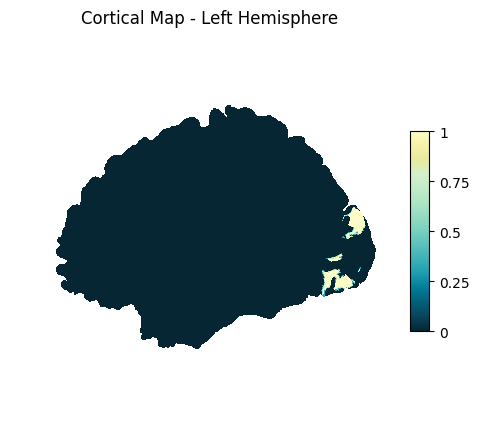

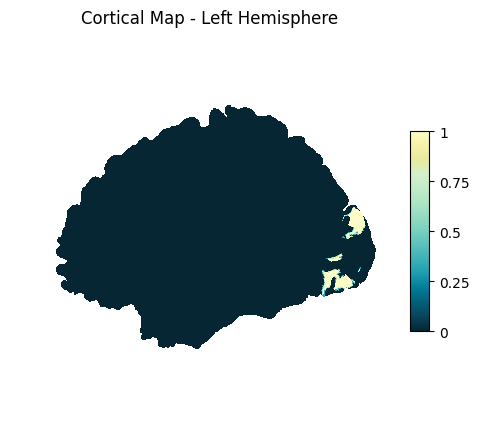

In [ ]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["VOFL"], depth = 0.1, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)

# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='lateral',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)
 

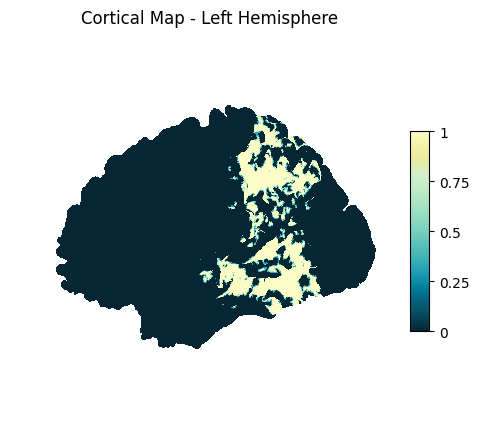

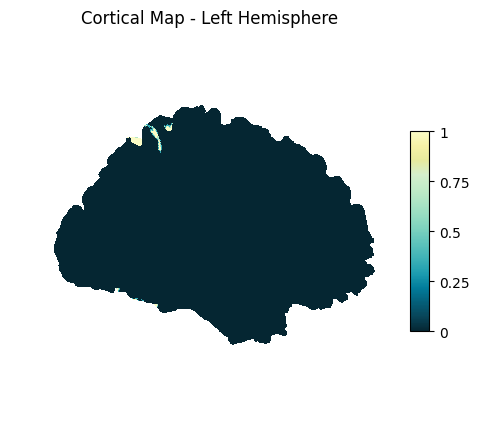

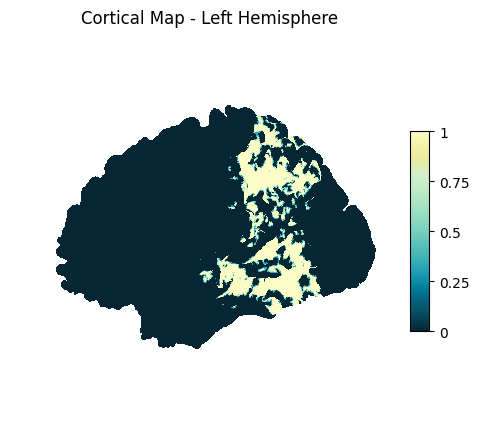

In [23]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["pARCL"], depth = 0.5, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)

# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='lateral',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)
 

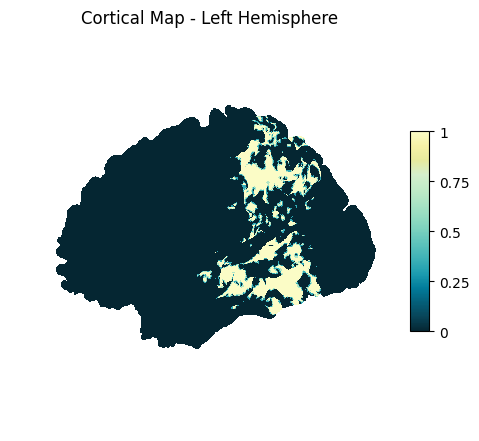

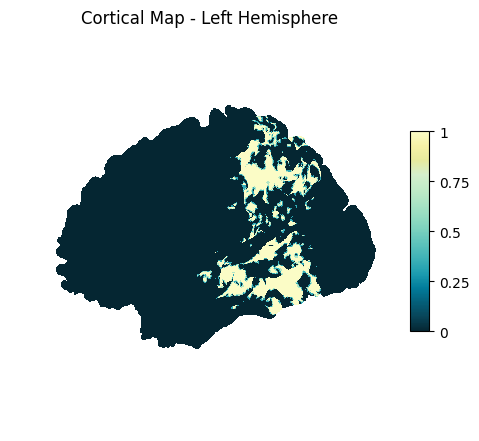

In [24]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["pARCL"], depth = 0.1, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)

# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='lateral',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)
 

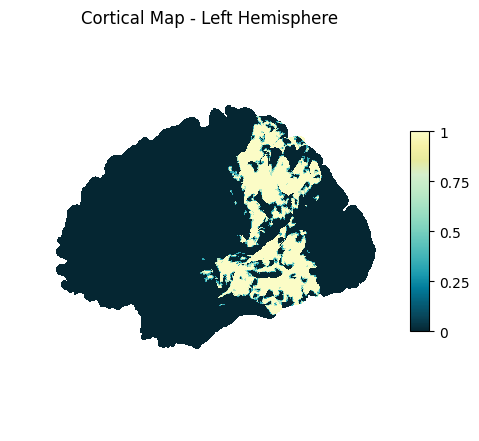

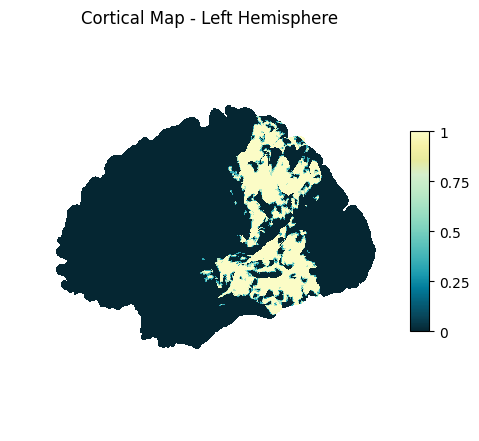

In [25]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["pARCL"], depth = 1.25, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)

# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='lateral',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)
 

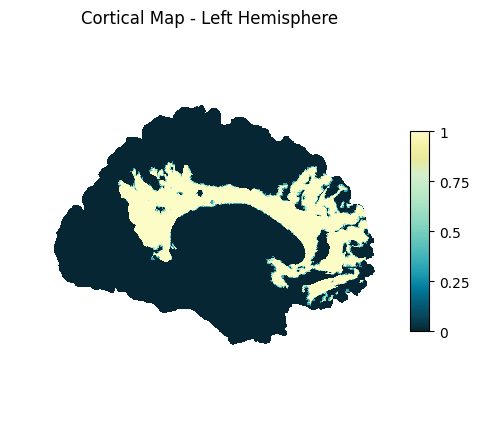

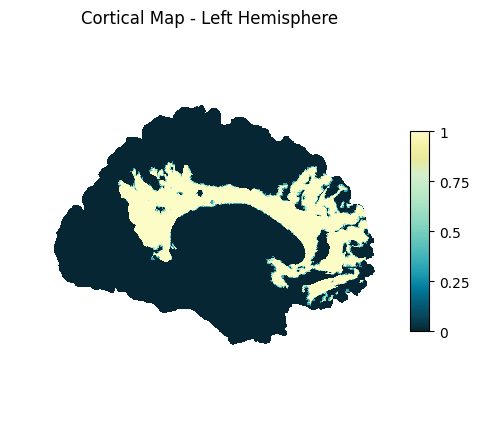

In [15]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["CGCL"], depth = 0.1, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)
# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='medial',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)


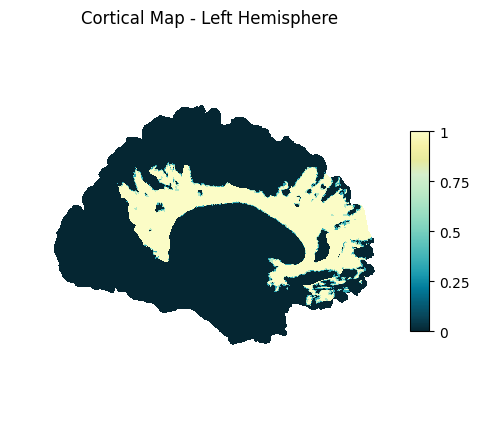

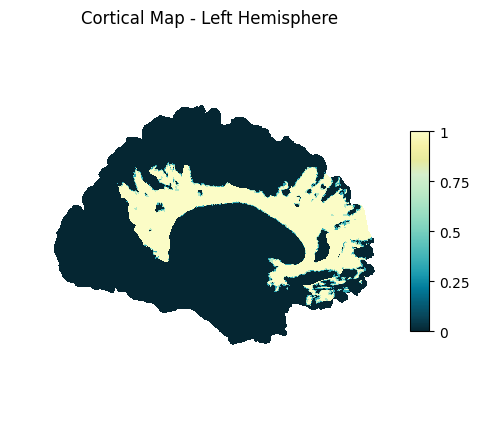

In [19]:
threshold = 0.5
cortical_map = apply_vol_to_surf(tdi_maps["CGCL"], depth = 1.25, surf_mesh = lh_surf_mesh)
cortical_map = (cortical_map > threshold).astype(int)
# Plot the cortical map for the left hemisphere
plotting.plot_surf_stat_map(
    lh_surf_mesh, 
    cortical_map, 
    hemi='left', 
    view='medial',
    cmap=aquamarine,
    title='Cortical Map - Left Hemisphere',
    colorbar=True
)
